In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Linearization Exploration

The goal of this notebook is to make some of the math you just saw more concrete by tying it to real code. 

Explore the functions defined here and then play around with linearizing various functions and zooming in on the operating point.

$$f_\text{lin}(x) = f(x_\text{op}) + f'(x)|_{x=x_{op}}(x-x_0)$$

#### TODO 1 - explore the code
Go through the 3 functions below and try to understand how they work. Make an effort to connect the code in the `linearize` function to the equation shown above.

In [2]:
def linearize(function, operating_point):
    """
    Returns a linearized version of the function that will
    be valid within some window around the operating point.
    """
    f_at_op = function(operating_point)
    slope_at_op = get_function_slope_at_point(function, operating_point)
    
    def linearized(x):
        return f_at_op + slope_at_op * (x - operating_point)
    
    return linearized

In [3]:
def get_function_slope_at_point(f, x):
    """
    Calculates the slope of a function f at the value x.
    """
    dx = 0.00001
    vertical_change = f(x+dx) - f(x-dx)
    horizontal_change = 2*dx
    return vertical_change / horizontal_change

In [4]:
def plot_compare(f1, f2, centered_at=0.0, zoom=1.0):
    """
    Compares the graphs of two functions. Increase zoom 
    to zoom in.
    """
    window_width = 8 / zoom
    left = centered_at - window_width/2
    right =centered_at + window_width/2
    t = np.linspace(left, right, 1000)
    plt.plot(t, f1(t))
    plt.plot(t, f2(t))
    plt.axis('equal')
    plt.scatter([centered_at], [f1(centered_at)])
    plt.legend(["$f(x)$", "$f_{lin}(x)$"])
    plt.show()
    
    print("Comparing", f1.__name__, "to its linear approximation")
    print("at x =", centered_at, "from", left, "to", right)
    print("Increase the zoom to see a better approximation")

#### TODO 2 - Play around with some functions!
Running the cells below will show various functions and their linear approximations.

Adjust the `zoom` parameter in each cell to zoom in. How much zoom is required before each function is closely matched by it's linear approximation?

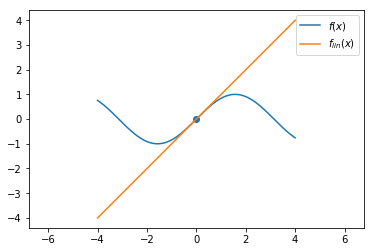

Comparing sin to its linear approximation
at x = 0.0 from -4.0 to 4.0
Increase the zoom to see a better approximation


In [5]:
f    = np.sin
op   = 0.0 
zoom = 1.0

f_lin = linearize(f, op)
plot_compare(f, f_lin, centered_at=op, zoom=zoom)

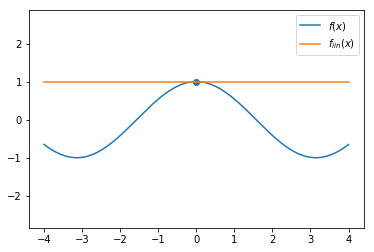

Comparing cos to its linear approximation
at x = 0.0 from -4.0 to 4.0
Increase the zoom to see a better approximation


In [6]:
f    = np.cos
op   = 0.0
zoom = 1.0

f_lin = linearize(f, op)
plot_compare(f, f_lin, centered_at=op, zoom=zoom)

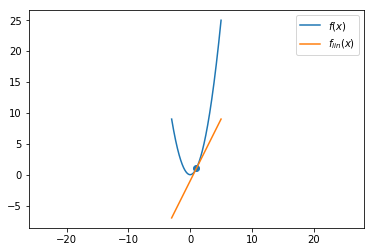

Comparing x_square to its linear approximation
at x = 1.0 from -3.0 to 5.0
Increase the zoom to see a better approximation


In [7]:
def x_square(n): 
    return n * n

f    = x_square
op   = 1.0
zoom = 1.0

f_lin = linearize(f, op)
plot_compare(f, f_lin, centered_at=op, zoom=zoom)

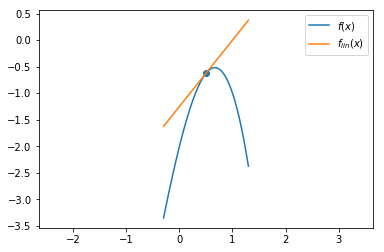

Comparing polynomial to its linear approximation
at x = 0.5 from -0.30000000000000004 to 1.3
Increase the zoom to see a better approximation


In [11]:
def polynomial(x):
    return -2 + 4*x - 2*x**2 - x**3

f    = polynomial
op   = 0.5
zoom = 5.0

f_lin = linearize(f, op)
plot_compare(f, f_lin, centered_at=op, zoom=zoom)